In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression

In [2]:
# load data
file_path = './data/IndiaAirQuality/india_air_quality.csv' 
df = pd.read_csv(file_path,encoding='unicode_escape')

/var/folders/hp/rx9_xs2s0z9f7xz1yr3rjcn40000gn/T/ipykernel_30013/3287093642.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path,encoding='unicode_escape')


In [3]:
# data check 
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [5]:
df.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [6]:
# pm2_5 컬럼 기준 결측치 존재할 경우 데이터 드롭
df = df.dropna(subset=['pm2_5'])

In [7]:
df.describe()

,so2,no2,rspm,spm,pm2_5
count,9195.000000,9218.000000,9254.000000,0.0,9314.000000
mean,8.083073,22.596812,91.845742,NaN,40.791467
std,5.901656,14.325752,51.794130,NaN,30.832525
min,0.100000,2.000000,10.000000,NaN,3.000000
25%,3.000000,13.000000,61.000000,NaN,24.000000
50%,6.000000,20.000000,83.000000,NaN,32.000000
75%,13.000000,25.150000,103.000000,NaN,46.000000
max,84.000000,134.000000,590.000000,NaN,504.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9314 entries, 65036 to 435426
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   stn_code                     9314 non-null   object 
 1   sampling_date                9314 non-null   object 
 2   state                        9314 non-null   object 
 3   location                     9314 non-null   object 
 4   agency                       9314 non-null   object 
 5   type                         9314 non-null   object 
 6   so2                          9195 non-null   float64
 7   no2                          9218 non-null   float64
 8   rspm                         9254 non-null   float64
 9   spm                          0 non-null      float64
 10  location_monitoring_station  9314 non-null   object 
 11  pm2_5                        9314 non-null   float64
 12  date                         9314 non-null   object 
dtypes: float64(5), ob

In [9]:
# spm 컬럼 모두 null -> 컬럼 기준 드롭 
df = df.drop(columns=['spm'], axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9314 entries, 65036 to 435426
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   stn_code                     9314 non-null   object 
 1   sampling_date                9314 non-null   object 
 2   state                        9314 non-null   object 
 3   location                     9314 non-null   object 
 4   agency                       9314 non-null   object 
 5   type                         9314 non-null   object 
 6   so2                          9195 non-null   float64
 7   no2                          9218 non-null   float64
 8   rspm                         9254 non-null   float64
 9   location_monitoring_station  9314 non-null   object 
 10  pm2_5                        9314 non-null   float64
 11  date                         9314 non-null   object 
dtypes: float64(4), object(8)
memory usage: 946.0+ KB


In [11]:
# pm2_5 컬럼 활용 level 컬럼 추출
def get_level(pm2_5):
    if pm2_5 >= 76:
        return 3 # 매우 나쁨
    elif pm2_5 >= 36 and pm2_5 < 76:
        return 2 # 나쁨
    elif pm2_5 >= 16 and pm2_5 < 36:
        return 1 # 보통
    elif pm2_5 < 16 :
        return 0 # 좋음
    
df['level'] = df.loc[:, ('pm2_5')].apply(get_level)

In [12]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,location_monitoring_station,pm2_5,date,level
65036,558.0,06-08-15,Dadra & Nagar Haveli,Khadoli,"Daman Diu, Dadra & Nagar Heveli Pollution Cont...",Industrial Area,18.0,31.0,104.0,"Khadoli Industrial Area, Village- Khadoli, Sil...",35.0,2015-08-06,1
65037,558.0,10-08-15,Dadra & Nagar Haveli,Khadoli,"Daman Diu, Dadra & Nagar Heveli Pollution Cont...",Industrial Area,14.0,26.0,94.0,"Khadoli Industrial Area, Village- Khadoli, Sil...",32.0,2015-08-10,1
65038,558.0,13-08-15,Dadra & Nagar Haveli,Khadoli,"Daman Diu, Dadra & Nagar Heveli Pollution Cont...",Industrial Area,16.0,28.0,99.0,"Khadoli Industrial Area, Village- Khadoli, Sil...",35.0,2015-08-13,1
65039,558.0,20-08-15,Dadra & Nagar Haveli,Khadoli,"Daman Diu, Dadra & Nagar Heveli Pollution Cont...",Industrial Area,13.0,23.0,82.0,"Khadoli Industrial Area, Village- Khadoli, Sil...",24.0,2015-08-20,1
65040,558.0,24-08-15,Dadra & Nagar Haveli,Khadoli,"Daman Diu, Dadra & Nagar Heveli Pollution Cont...",Industrial Area,14.0,29.0,93.0,"Khadoli Industrial Area, Village- Khadoli, Sil...",32.0,2015-08-24,1


In [13]:
df.describe()

,so2,no2,rspm,pm2_5,level
count,9195.000000,9218.000000,9254.000000,9314.000000,9314.000000
mean,8.083073,22.596812,91.845742,40.791467,1.421087
std,5.901656,14.325752,51.794130,30.832525,0.813719
min,0.100000,2.000000,10.000000,3.000000,0.000000
25%,3.000000,13.000000,61.000000,24.000000,1.000000
50%,6.000000,20.000000,83.000000,32.000000,1.000000
75%,13.000000,25.150000,103.000000,46.000000,2.000000
max,84.000000,134.000000,590.000000,504.000000,3.000000


In [14]:
# 결측치 개수 
print(df.isna().sum())

stn_code                         0
sampling_date                    0
state                            0
location                         0
agency                           0
type                             0
so2                            119
no2                             96
rspm                            60
location_monitoring_station      0
pm2_5                            0
date                             0
level                            0
dtype: int64


In [17]:
# 결측치 보강
df['so2'] = df['so2'].fillna(df.so2.median())
df['no2'] = df['no2'].fillna(df.no2.median())
df['rspm'] = df['rspm'].fillna(df.no2.median())

In [18]:
df.isna().sum()

stn_code                       0
sampling_date                  0
state                          0
location                       0
agency                         0
type                           0
so2                            0
no2                            0
rspm                           0
location_monitoring_station    0
pm2_5                          0
date                           0
level                          0
dtype: int64

In [19]:
# drop categorical or objective columns
# df = df[df.describe().columns]
drop_col_list= ['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type', 'location_monitoring_station', 'date']
df = df.drop(columns=drop_col_list)
df.head()

,so2,no2,rspm,pm2_5,level
65036,18.0,31.0,104.0,35.0,1
65037,14.0,26.0,94.0,32.0,1
65038,16.0,28.0,99.0,35.0,1
65039,13.0,23.0,82.0,24.0,1
65040,14.0,29.0,93.0,32.0,1


In [20]:
df.isna().sum()

so2      0
no2      0
rspm     0
pm2_5    0
level    0
dtype: int64

In [21]:
# level 별 컬럼의 평균 확인 
df.groupby(by='level')['so2'].mean().reset_index()

,level,so2
0,0,3.930847
1,1,9.178785
2,2,7.784880
3,3,7.765121


In [22]:
df.groupby(by='level')['no2'].mean().reset_index()

,level,no2
0,0,13.007636
1,1,19.092326
2,2,24.974199
3,3,40.449496


In [23]:
df.groupby(by='level')['rspm'].mean().reset_index()

,level,rspm
0,0,43.559623
1,1,74.404517
2,2,103.094851
3,3,179.842742


In [24]:
df.groupby(by='level')['pm2_5'].mean().reset_index()

,level,pm2_5
0,0,11.925732
1,1,26.753838
2,2,48.440415
3,3,109.577621


/var/folders/hp/rx9_xs2s0z9f7xz1yr3rjcn40000gn/T/ipykernel_30013/977787372.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(data=df.groupby('level')['so2'].mean().reset_index(), x='level', y='so2', palette='hls', width=0.5)
/var/folders/hp/rx9_xs2s0z9f7xz1yr3rjcn40000gn/T/ipykernel_30013/977787372.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(data=df.groupby('level')['no2'].mean().reset_index(), x='level', y='no2',palette='hls', width=0.5)
/var/folders/hp/rx9_xs2s0z9f7xz1yr3rjcn40000gn/T/ipykernel_30013/977787372.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `lege

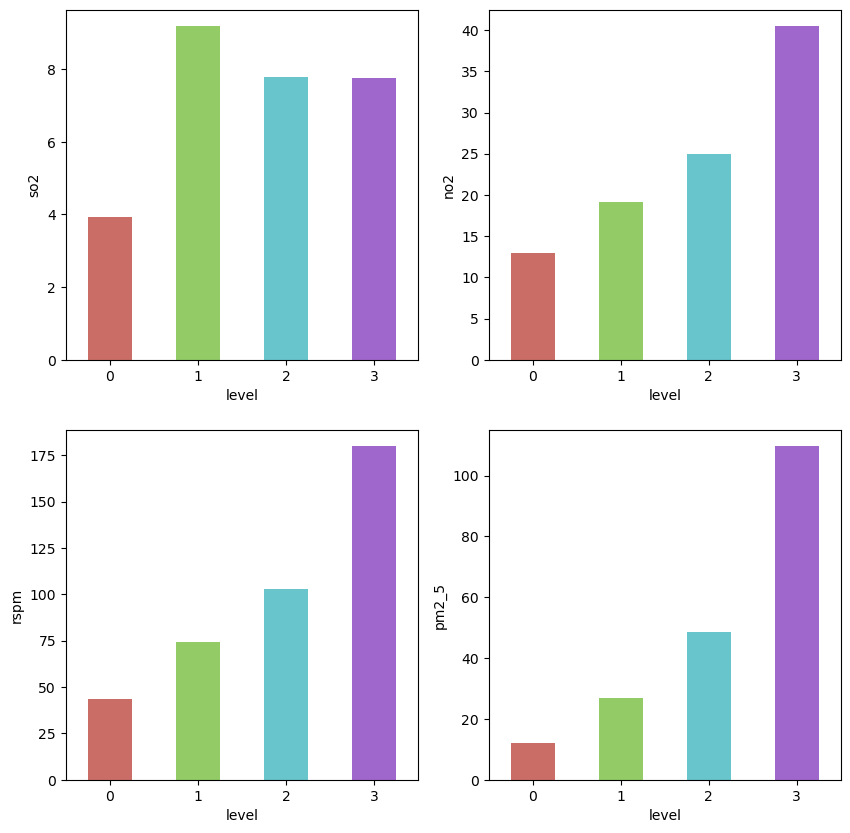

In [25]:
# 시각화 
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(data=df.groupby('level')['so2'].mean().reset_index(), x='level', y='so2', palette='hls', width=0.5)

ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(data=df.groupby('level')['no2'].mean().reset_index(), x='level', y='no2',palette='hls', width=0.5)

ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(data=df.groupby('level')['rspm'].mean().reset_index(), x='level', y='rspm',palette='hls', width=0.5)

ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(data=df.groupby('level')['pm2_5'].mean().reset_index(), x='level', y='pm2_5',palette='hls', width=0.5)

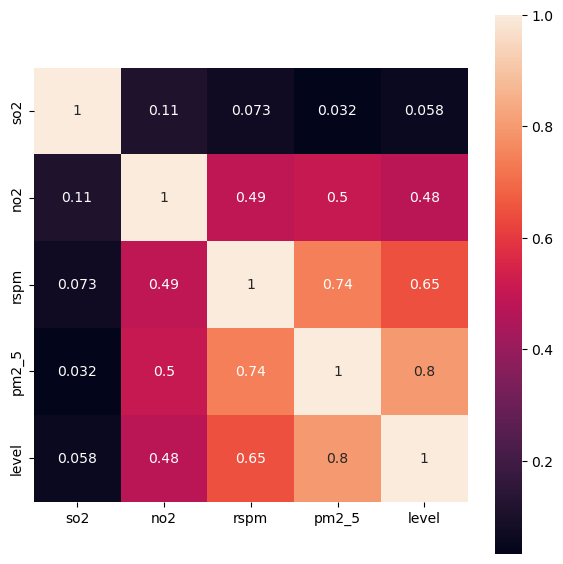

In [26]:
# corr() heatmap
fig = plt.figure(figsize=(7,7))
ax = sns.heatmap(df.corr(), annot=True, square=True)

In [27]:
# train test split 
from sklearn.model_selection import train_test_split

In [28]:
print(len(df))

9314


In [30]:
X = df.drop(columns=['level'])
y = df[['level']]
print(X.shape)
print(y.shape)

(9314, 4)
(9314, 1)


In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [32]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7451, 4)
(7451, 1)
(1863, 4)
(1863, 1)


In [33]:
# model load & fit(train)
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [34]:
# model predict
preds = model.predict(x_test)

In [35]:
print(preds.shape)

(1863, 1)


In [38]:
# 모델 평가 
from sklearn.metrics import mean_squared_error, r2_score,f1_score

rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)
# f1 = f1_score(y_test, preds)

print(f"RMSE : {rmse}")
print(f"R Square : {r2}")
# print(f"F1 score : {f1}")

RMSE : 0.47683041026360606
R Square : 0.6562009415837811


In [39]:
print(y_test)

        level
193562      0
362520      2
434253      1
288345      1
99783       1
...       ...
80229       1
193349      3
362510      2
73727       3
99669       1

[1863 rows x 1 columns]


In [40]:
print(preds)

[[0.91232619]
 [1.45679408]
 [1.09838708]
 ...
 [1.62439554]
 [2.7881945 ]
 [1.16228121]]


In [46]:
# round preds
round_preds = np.round(preds)
round_preds

array([[1.],
       [1.],
       [1.],
       ...,
       [2.],
       [3.],
       [1.]])

In [45]:
# 모델 평가 after round
rmse = np.sqrt(mean_squared_error(y_test, round_preds))
r2 = r2_score(y_test, round_preds)
# f1 = f1_score(y_test, preds)

print(f"RMSE : {rmse}")
print(f"R Square : {r2}")

RMSE : 0.5884010375572002
R Square : 0.47649160258784073
